In [34]:
experiment = 'domains-no_hard_negatives-fixed2'
# experiment = 'one_map-batch_32'
# experiment = 'one_map-batch_8'

metrics = ['p1', 'p5', 'mrr']
# metrics = ['p1']

variant = 'all'
variant = 'only_leafs'
variant = 'only_leafs_limited_types'

ext = 'svg'
ext = 'pdf'

In [35]:
from kialo_domains_util import get_subtopic_to_parent
sub2maintopic, main2subtopic = get_subtopic_to_parent('data/kialo_domains.tsv')
domains = list(main2subtopic.keys())
domains

['religion',
 'gender',
 'enviroment',
 'animals',
 'democracy',
 'europe',
 'technology',
 'education',
 'history',
 'violence',
 'military',
 'business',
 'human rights',
 'health',
 'morality',
 'philosophy',
 'science',
 'culture',
 'law',
 'finance',
 'usa',
 'immigration']

In [47]:
import pandas as pd
from pathlib import Path
import json

data_path = Path.home() / 'data/delib-results/results'

def read_results(path):
    print(path)
#     print(list(data_path.glob(path)))
    all_results = []
    for i, f in enumerate(data_path.glob(path)):
        if not str(f).endswith('-train.json'):
            results = json.loads(f.read_text())
#             print(f)
#             print(results)
#             all_results.append({'source': s[s.find('trained-on-')+len('trained-on-'):s.rfind('-')] if 'trained-on-' in s else 'source', 'target': f.stem, **{metric: results[variant][metric] for metric in metrics}})
            all_results.append({'source': domains[int(f.parent.parent.name.split('-')[0][len('domain'):])], 'target': f.parent.name, **{metric: results[variant][metric] for metric in metrics}})

    df = pd.DataFrame(all_results)
    return df
df = read_results(f'{experiment}/*-results/*/-avg.json')
df

domains-no_hard_negatives-fixed2/*-results/*/-avg.json


,source,target,p1,p5,mrr
0,science,science,0.177624,0.435805,0.300447
1,science,religion,0.204088,0.440886,0.318909
2,science,gender,0.204972,0.433995,0.314905
3,gender,religion,0.211408,0.465311,0.331539
4,gender,gender,0.249268,0.456979,0.355359
5,animals,religion,0.210672,0.457026,0.327515
6,animals,gender,0.212056,0.448078,0.325949
7,animals,animals,0.243860,0.483625,0.378278
8,culture,culture,0.288809,0.539097,0.415833
9,culture,religion,0.214369,0.454827,0.330539


In [37]:
df[df['source']=='religion']

,source,target,p1,p5,mrr
38,religion,religion,0.246093,0.508307,0.367519
39,religion,gender,0.217843,0.453711,0.332290


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(metric, i):
    g = sns.heatmap(df.pivot_table(values=metric, index='source', columns='target'), annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.5, dark=0.3, light=.80, reverse=True, as_cmap=True),cbar=False, ax=axes[i])
    g.set_xticklabels(g.get_xticklabels(), rotation = 30);
    fig = g.get_figure()
    plt.tight_layout()
    return fig

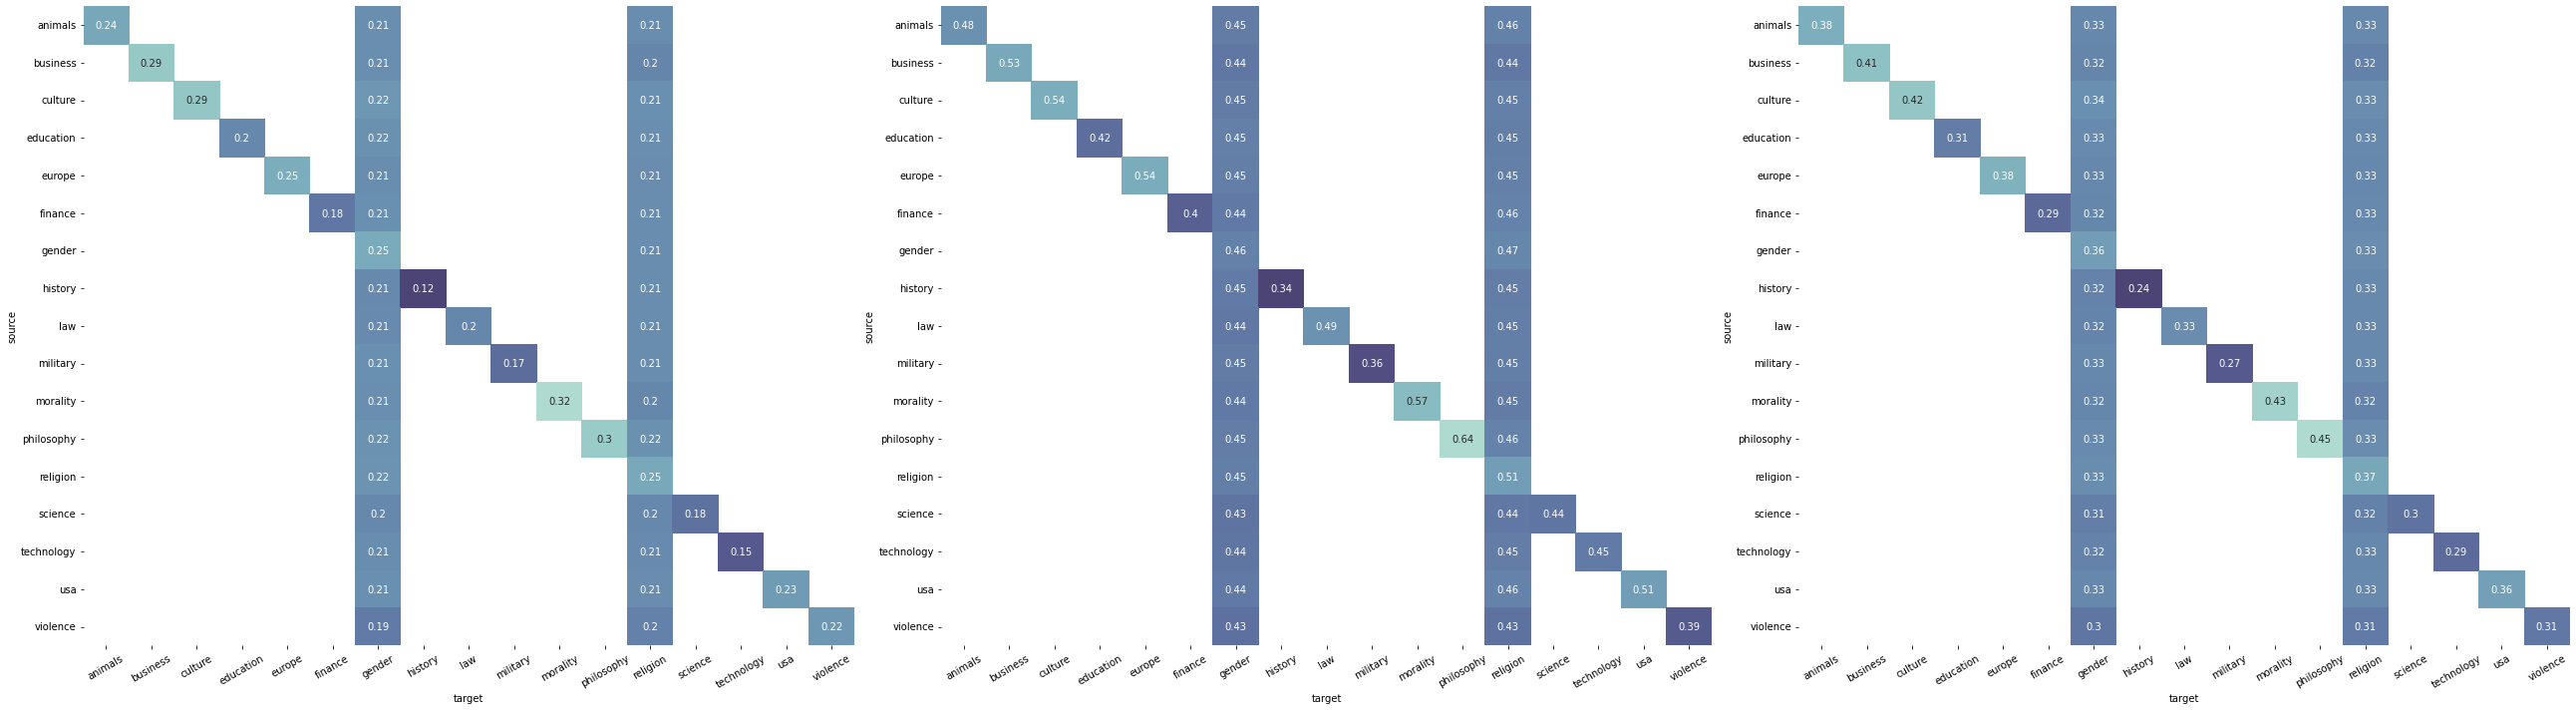

In [39]:
f, axes = plt.subplots(1, len(metrics), figsize=(12*len(metrics), 10))

for i, metric in enumerate(metrics):
    fig=plot(metric, i)

# fig.savefig(f'results/kialo-{variant}-{"-".join(metrics)}.{ext}', format=ext)

In [48]:
df_same = df[df['source']==df['target']]
df_same['source'] = 'same'
df = df_same

<ipython-input-48-a6e17b9df55f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_same['source'] = 'same'


<ipython-input-38-b42c84381ffa>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
<ipython-input-38-b42c84381ffa>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
<ipython-input-38-b42c84381ffa>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


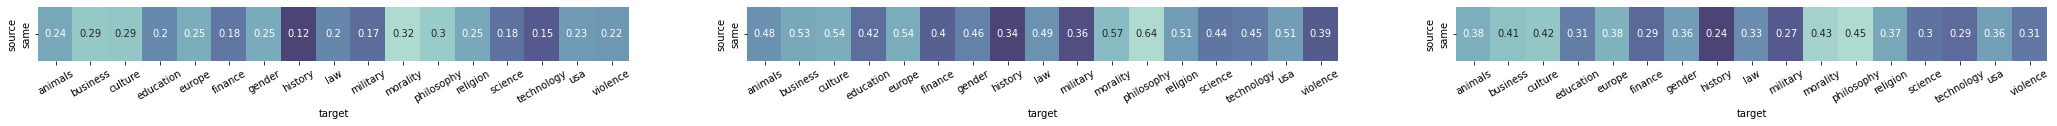

In [50]:
f, axes = plt.subplots(1, len(metrics), figsize=(12*len(metrics), 1))

for i, metric in enumerate(metrics):
    fig=plot(metric, i)

# fig.savefig(f'results/{variant}-{"-".join(metrics)}.{ext}', format=ext)

In [ ]:
# df = read_results('xlm-roberta-base-evaluated-on-*-results/*')
# df = read_results('xlm-roberta-base-dev-evaluated-on-*-dev-*-results/*')
df = read_results(f'{experiment}/*-results/*')
df['source'] = 'others'
df

In [ ]:
f, axes = plt.subplots(1, len(metrics), figsize=(4*len(metrics), 0.5))

for i, metric in enumerate(metrics):
    fig=plot(metric, i)

fig.savefig(f'results/others-{experiment}-{variant}-{"-".join(metrics)}.{ext}', format=ext)